In [1]:
# check whether the parameter distribution of one parameter is correct

In [95]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob, toml

In [3]:
# b = 145
b = 207

df_iter0 = pd.read_csv(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_all_meanparam.csv')
df_info = pd.read_pickle(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/param_sets/all_default_parameters.pkl')

param_defa = df_info['Default'].values
param_lower = df_info['Lower'].values
param_upper = df_info['Upper'].values
param_name = df_info['Parameter'].values

param_iter0 = df_iter0.values
nparam = len(param_upper)

print(param_iter0.shape)

(400, 17)


In [4]:
print('compare iter-0 first param set with defa. they should be the same')
param_iter0[0] - param_defa

compare iter-0 first param set with defa. they should be the same


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

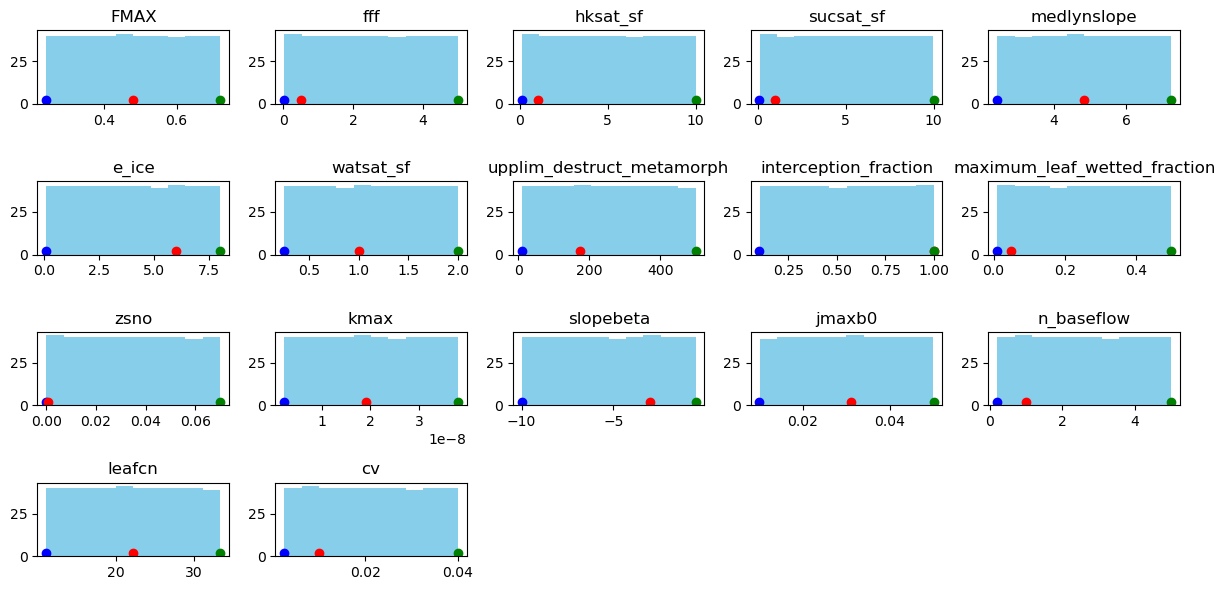

In [5]:
fig = plt.figure(figsize=[12, 6])

for i in range(nparam):
    fig.add_subplot(4, 5, i+1)
    plt.hist(param_iter0[:,i], facecolor='skyblue')
    plt.plot(param_lower[i], 2, 'ob')
    plt.plot(param_defa[i], 2, 'or')
    plt.plot(param_upper[i], 2, 'og')
    
    plt.title(param_name[i])

plt.tight_layout()
plt.show()

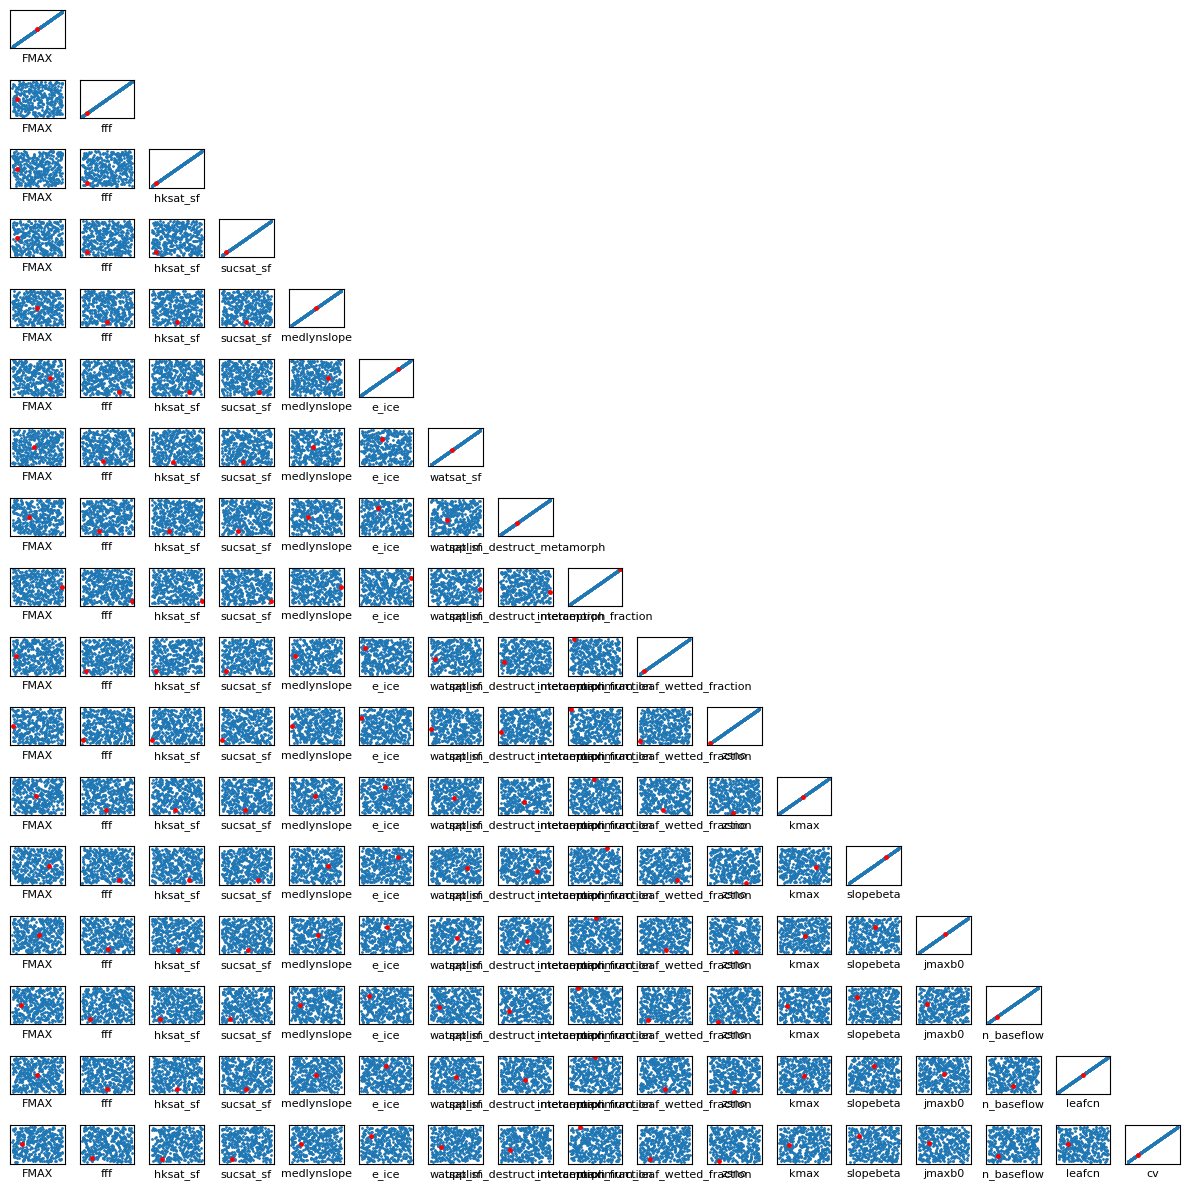

In [6]:
fig = plt.figure(figsize=[12, 12])

flag = 1
for i in range(nparam):
    for j in range(nparam):
        fig.add_subplot(nparam, nparam, flag)
        flag = flag + 1
        if i >= j:
            plt.scatter(param_iter0[:,i], param_iter0[:,j], 1)
            plt.scatter(param_defa[i], param_defa[j], 6, color='r')
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(param_name[i], fontsize=8)
            plt.xlabel(param_name[j], fontsize=8)
        else:
            plt.axis('off')


plt.tight_layout()
plt.show()
    

# check horizontal or vertical lines in metrics

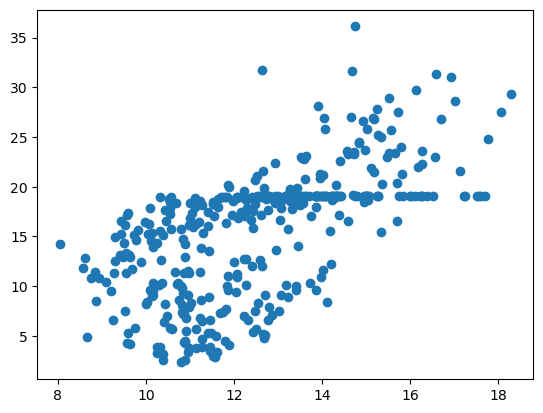

In [15]:
df_met = pd.read_csv(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_all_metric.csv')
met = df_met.values
plt.scatter(met[:,0], met[:,1])

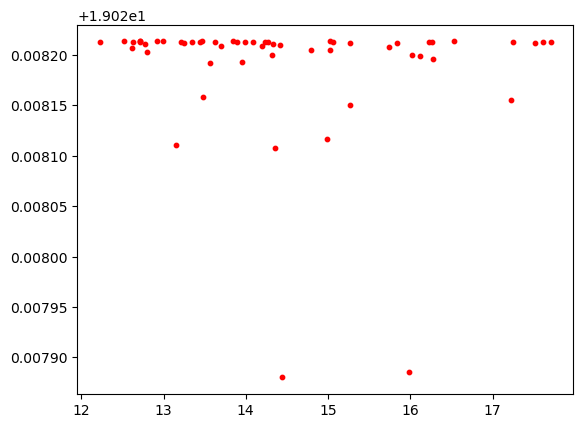

In [64]:
# Thresholds for differences
threshold_met0 = 0.05
threshold_met1 = 0.00001

# Find pairs of indices that satisfy the conditions
pairs = []
ind = []
for i in range(len(met)):
    for j in range(i + 1, len(met)):
        diff_met0 = abs(met[i, 0] - met[j, 0])
        diff_met1 = abs(met[i, 1] - met[j, 1])
        if diff_met1 < threshold_met1 and diff_met0 > threshold_met0:
            pairs.append((i, j))
            ind.append(i)
            ind.append(j)

unique_indices = list(set(ind))

plt.scatter(met[unique_indices,0], met[unique_indices,1], 10, color='r')
plt.show()

(11.5, 18.0)

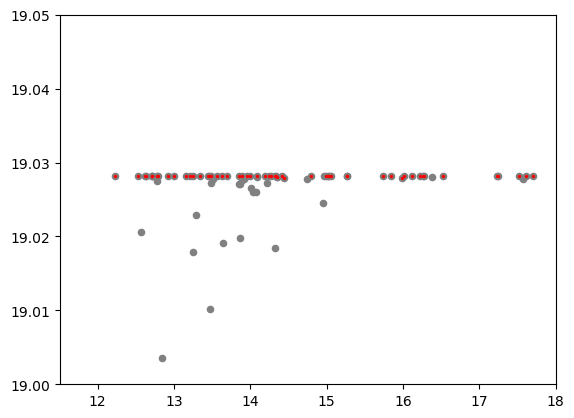

In [59]:
plt.scatter(met[:,0], met[:,1], 20, color='grey')
plt.scatter(met[unique_indices,0], met[unique_indices,1], 2, color='r')
plt.ylim([19, 19.05])
plt.xlim([11.5, 18])

In [68]:
for i in range(len(unique_indices)):
    print(unique_indices[i], met[unique_indices[i], 0], met[unique_indices[i], 1])

1 12.921801879542214 19.028213255508
385 13.211255720387411 19.028213090879763
132 13.623007406337024 19.02821321866908
391 15.027642353536976 19.0282049058882
264 13.462603547166216 19.02821325067161
137 14.437449734656555 19.027880117413847
395 14.416857709330742 19.02820978593134
396 15.058162624542692 19.028213108546325
13 13.343398494568856 19.028213187530785
139 16.015586933860682 19.02819990195063
144 17.25152655620811 19.02821285648228
273 16.22794876639129 19.02821307916929
274 14.99306798974897 19.02811660572961
20 13.695624245188483 19.02820907020503
278 15.837279133581005 19.02821218569948
25 12.993600164759483 19.028213245184656
28 12.614531751034663 19.02820648176132
285 12.631518461553169 19.028213225703382
160 12.713289738730197 19.02821325136461
291 13.4470507815223 19.02821260572292
38 13.95524052697904 19.028192604893004
40 15.020294790723469 19.028213256533043
169 13.888953652558202 19.02821323080834
296 15.74128964438848 19.028207513743563
171 17.514819651710603 19

In [69]:
t1 = 1
t2 = 79
infiles1 = glob.glob(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_trial{t1}/lnd/hist/*.h1.*.nc')
infiles1.sort()
ds1 = xr.open_mfdataset(infiles1)

infiles2 = glob.glob(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_trial{t2}/lnd/hist/*.h1.*.nc')
infiles2.sort()
ds2 = xr.open_mfdataset(infiles2)


In [107]:
def read_CAMELS_Q(file_Qobs):
    df_q_in = pd.read_csv(file_Qobs, delim_whitespace=True, header=None)
    years = df_q_in[1].values
    months = df_q_in[2].values
    days = df_q_in[3].values
    dates = [f'{years[i]}-{months[i]:02}-{days[i]:02}' for i in range(len(years))]
    dates = pd.to_datetime(dates)
    q_obs = df_q_in[4].values * 0.028316847  # cfs to cms
    q_obs[q_obs < 0] = -9999.0
    df_q_out = pd.DataFrame({'Date': dates, 'Runoff_cms': q_obs})
    
    # fill possible missing values
    df_q_out.set_index('Date', inplace=True)
    date_range = pd.date_range(start=dates[0], end=dates[-1], freq='D')
    df_q_out = df_q_out.reindex(date_range)
    df_q_out.fillna(-9999, inplace=True)
    df_q_out.reset_index(inplace=True)
    df_q_out = df_q_out.rename(columns={'index': 'Date'})

    return df_q_out
    
infile_config = f'/glade/work/guoqiang/CTSM_CAMELS/Calib_HH_MOASMO_bigrange/configuration/_level1-{b}_config_MOASMO.toml'
config = toml.load(infile_config)
infile_q = config['file_Qobs']
df_q = read_CAMELS_Q(infile_q)


# Filter data for the specified date range
start_date = '2006-10-01'
end_date = '2012-10-01'
mask = (df_q['Date'] >= start_date) & (df_q['Date'] < end_date)
filtered_df = df_q.loc[mask]

# Set the Date column as the index
filtered_df.set_index('Date', inplace=True)

# Resample data by month and calculate the mean
monthly_mean = filtered_df.resample('M').mean()

# Calculate the mean for each month (January to December) over the years
monthly_mean['Month'] = monthly_mean.index.month
monthly_mean['Year'] = monthly_mean.index.year

# Calculate the mean runoff for each month
mean_per_month = monthly_mean.groupby('Month')['Runoff_cms'].mean()



In [112]:
filesurf = f'/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/disaggregation/surfdata_CAMELS_level1_hist_78pfts_CMIP6_simyr2000_HAND_trapezoidal_{b}.nc'
ds_surf = xr.open_dataset(filesurf)
area = ds_surf.AREA.values
mean_per_month_scale = mean_per_month /(area * 1e6) * 1000

In [74]:
r1 =  ds1.QRUNOFF.isel(lndgrid=0)
r2 =  ds2.QRUNOFF.isel(lndgrid=0)
r1 = r1.load()
r2 = r2.load()

In [93]:
r1m = r1.resample(time="ME").mean(dim="time")
r2m = r2.resample(time="ME").mean(dim="time")

r1sm = r1.groupby("time.month").mean("time")
r2sm = r2.groupby("time.month").mean("time")

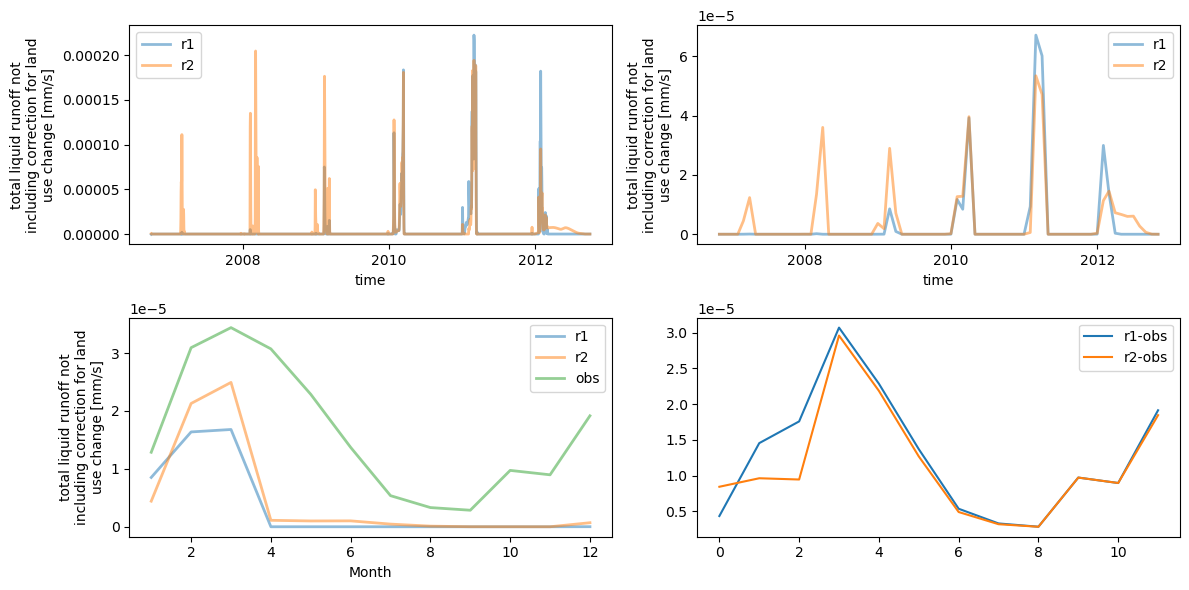

In [119]:
fig = plt.figure(figsize=[12, 6])

fig.add_subplot(2,2,1)
r1.plot(label='r1', linewidth=2, alpha=0.5)
r2.plot(label='r2', linewidth=2, alpha=0.5)
plt.legend()

fig.add_subplot(2,2,2)
r1m.plot(label='r1', linewidth=2, alpha=0.5)
r2m.plot(label='r2', linewidth=2, alpha=0.5)
plt.legend()

fig.add_subplot(2,2,3)
r1sm.plot(label='r1', linewidth=2, alpha=0.5)
r2sm.plot(label='r2', linewidth=2, alpha=0.5)
mean_per_month_scale.plot(label='obs', linewidth=2, alpha=0.5)
plt.legend()


fig.add_subplot(2,2,4)
plt.plot(np.abs(r1sm - mean_per_month_scale).values, label='r1-obs')
plt.plot(np.abs(r2sm - mean_per_month_scale).values, label='r2-obs')
plt.legend()

plt.tight_layout()
plt.show()